In [0]:
from google.colab import files
uploaded = files.upload()
### https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92


Saving customers.csv to customers (2).csv


In [0]:
uploaded_lib = files.upload()

Saving visuals.py to visuals (2).py


## Question 1

In [0]:
import pandas as pd
import numpy as np
import io
import visuals as vs

df = pd.read_csv(io.StringIO(uploaded['customers.csv'].decode('utf-8')))

In [0]:
# Drop the channel + region columns
df = df.drop(['Channel', 'Region'], axis=1)
print('Data columns after dropping 2 columns:')
df.dtypes


Data columns after dropping 2 columns:


Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [0]:
# Convert the remaining columns to floats if necessary
for col in df.columns:
    df[col] = df[col].astype(np.float)
print('Data types after casting all features to float types:')    
print(df.dtypes)

# Copy the version of data
data = df.copy()

Data types after casting all features to float types:
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object


## Question 2

Correlations between features:


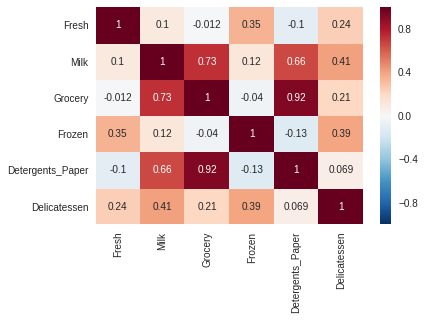

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Correlations between features:')
sns.heatmap(data.corr(), annot=True)
plt.show()

Correlations plots of the new data:


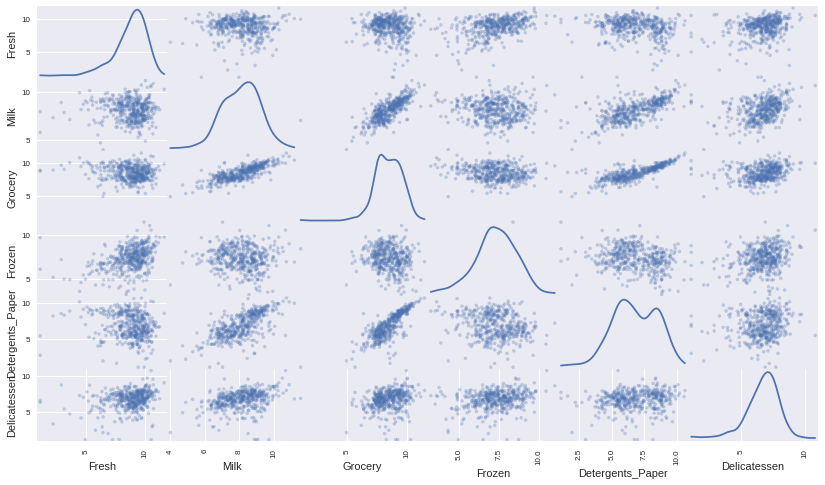

In [0]:
# Perform any transformations and scale data using natural logarithm
log_data = np.log(data)

# View the pairwise correlation plots of the new data.
print('Correlations plots of the new data:')
pd.plotting.scatter_matrix(log_data, 
                           alpha = 0.3, 
                           figsize = (14,8), 
                           diagonal = 'kde')
plt.show()

## Question 3

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
pipe = Pipeline([('log', FunctionTransformer(np.log))])
new_data = pipe.transform(data)
new_data = pd.DataFrame(new_data, columns = log_data.columns)
print('Compare first element from log_data: %f and from pipeline: %f' 
      % (log_data.iloc[0,0], new_data.iloc[0,0]))


Compare first element from log_data: 9.446913 and from pipeline: 9.446913


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


## Question 4

-------- (1) DIMENSION(S) ------------
             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4424  0.1737 -0.3945  -0.4544  0.1722   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7455       -0.1494  


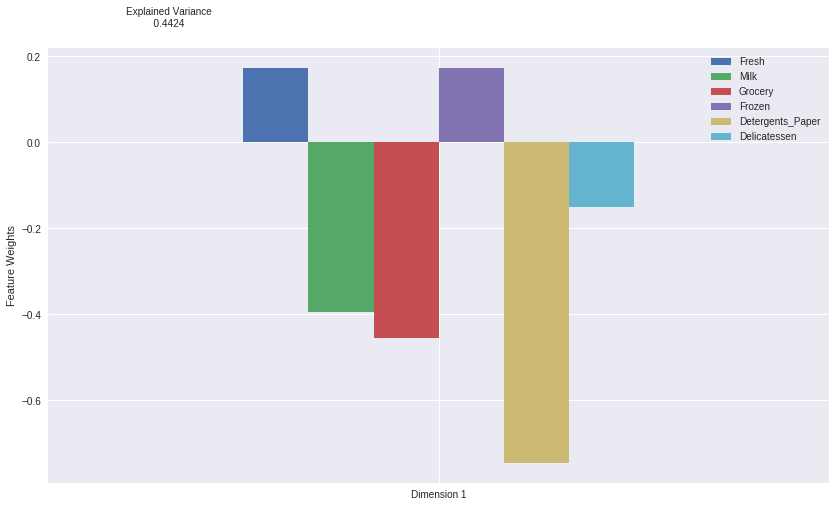

-------- (2) DIMENSION(S) ------------
             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4424  0.1737 -0.3945  -0.4544  0.1722   
Dimension 2              0.2766 -0.6851 -0.1624  -0.0694 -0.4877   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7455       -0.1494  
Dimension 2           -0.0419       -0.5097  


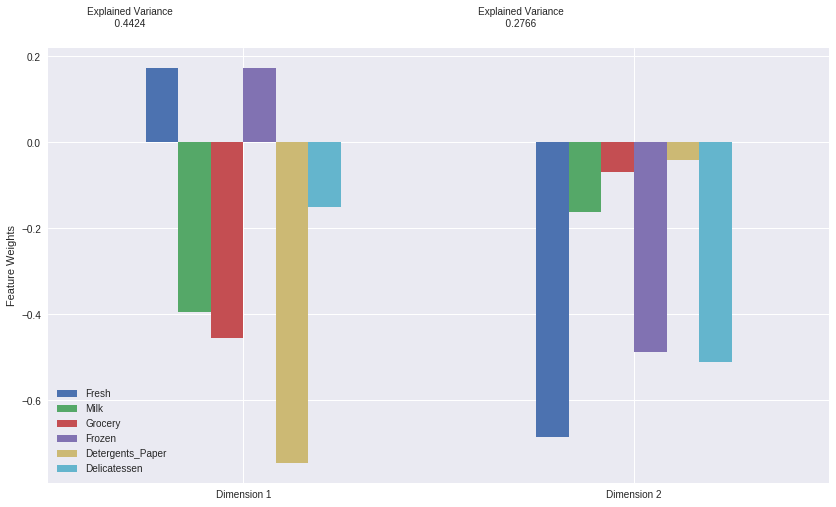

Plot the explained variance and feature importances:


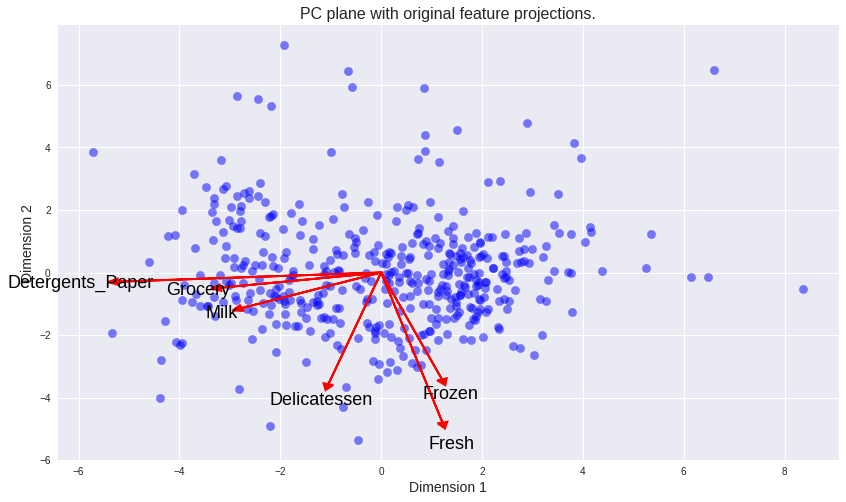

-------- (3) DIMENSION(S) ------------
             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4424  0.1737 -0.3945  -0.4544  0.1722   
Dimension 2              0.2766 -0.6851 -0.1624  -0.0694 -0.4877   
Dimension 3              0.1162 -0.6735  0.0331  -0.0322  0.2848   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7455       -0.1494  
Dimension 2           -0.0419       -0.5097  
Dimension 3           -0.2182        0.6446  


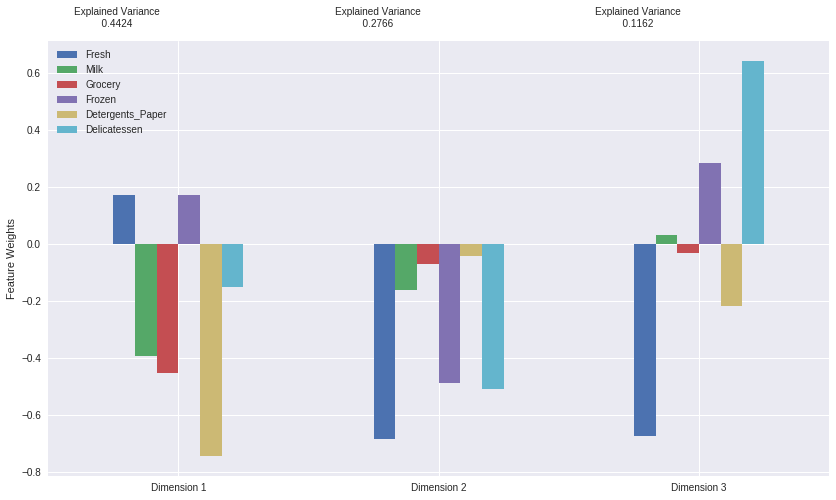

Plot the explained variance and feature importances:


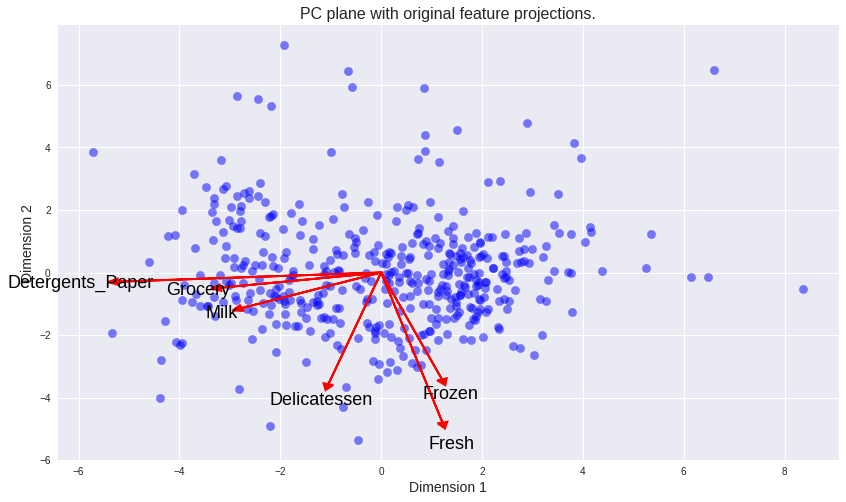

-------- (4) DIMENSION(S) ------------
             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4424  0.1737 -0.3945  -0.4544  0.1722   
Dimension 2              0.2766 -0.6851 -0.1624  -0.0694 -0.4877   
Dimension 3              0.1162 -0.6735  0.0331  -0.0322  0.2848   
Dimension 4              0.0962 -0.2143  0.0186   0.0645  0.8061   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7455       -0.1494  
Dimension 2           -0.0419       -0.5097  
Dimension 3           -0.2182        0.6446  
Dimension 4            0.1901       -0.5135  


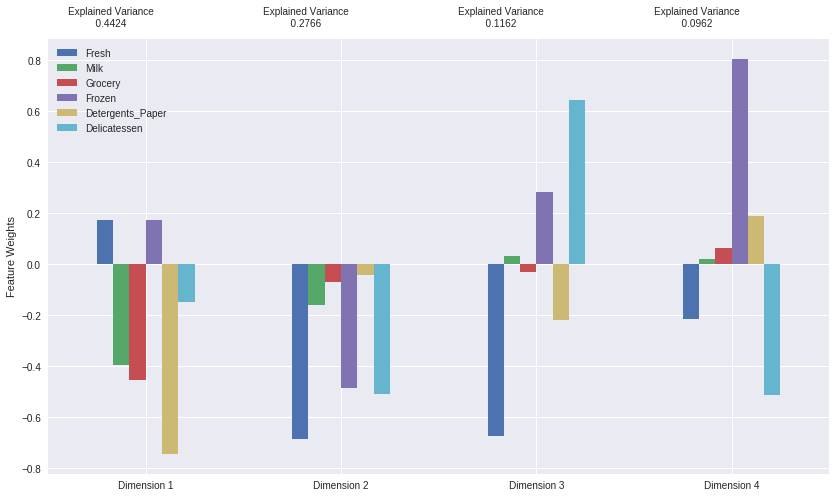

Plot the explained variance and feature importances:


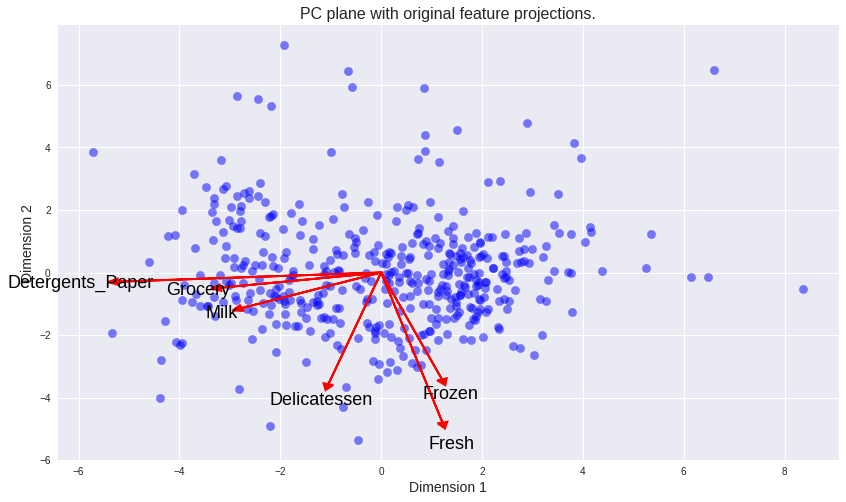

-------- (5) DIMENSION(S) ------------
             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4424  0.1737 -0.3945  -0.4544  0.1722   
Dimension 2              0.2766 -0.6851 -0.1624  -0.0694 -0.4877   
Dimension 3              0.1162 -0.6735  0.0331  -0.0322  0.2848   
Dimension 4              0.0962 -0.2143  0.0186   0.0645  0.8061   
Dimension 5              0.0458 -0.0008  0.7223   0.3480 -0.0362   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7455       -0.1494  
Dimension 2           -0.0419       -0.5097  
Dimension 3           -0.2182        0.6446  
Dimension 4            0.1901       -0.5135  
Dimension 5           -0.5637       -0.1954  


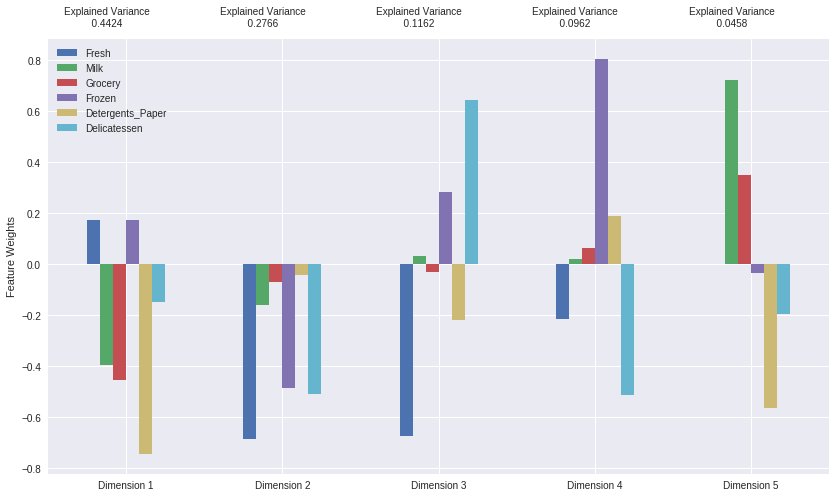

Plot the explained variance and feature importances:


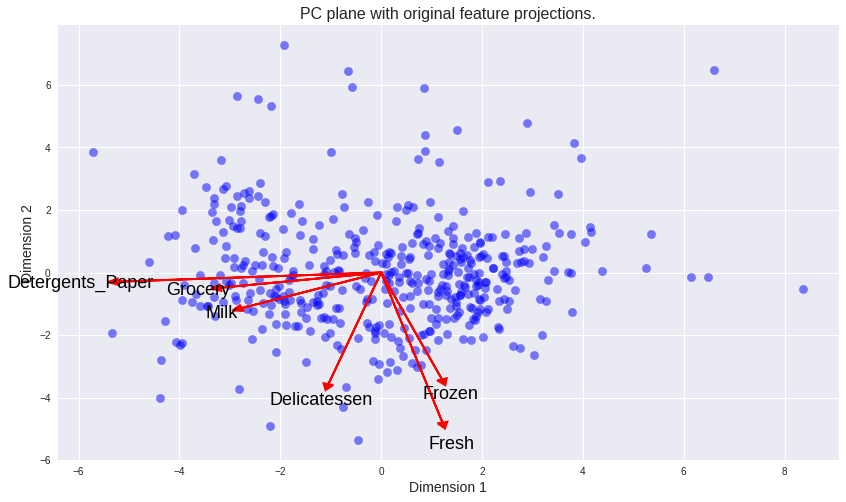

In [0]:
from sklearn.decomposition import PCA

for n in range(1, 6):
    pca = PCA(n_components=n)
    pca.fit(new_data)
    pca_results = vs.pca_results(new_data, pca)
    print('-------- (%.0f) DIMENSION(S) ------------' % (n))
    print(pca_results)
    plt.show()
    if n == 1:
        continue
    print('Plot the explained variance and feature importances:')
    # Transform the data into new dimensions
    transformed_data = pca.transform(new_data)
    # Create Dataframe for the transformed data
    transformed_data = pd.DataFrame(transformed_data, 
                            columns = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)])    
    
    vs.biplot(new_data, transformed_data, pca)
    plt.show()

## Question 5

In [0]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kernel_pca.fit(new_data)

print('Kernel PCA explained variance:')
kpca_transform = kernel_pca.transform(new_data)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance)


Kernel PCA explained variance:
[0.11887337 0.06649068]


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
# This step for download file "Human_Activity_Recognition_Using_Smartphones_Data.csv"
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
file_id = '1vL7GbX84wmG643sslWN1XX0vZRqgp3eg'
downloaded = drive.CreateFile({'id': file_id})

In [25]:
from google.colab import files
uploaded_lib = files.upload()

Saving visuals.py to visuals (2).py


## Question 6

In [0]:
import pandas as pd
import numpy as np
import io
import visuals as vs
from google.colab import files

In [27]:
downloaded.GetContentFile('Week5_Data_Human_Activity_Recognition_Using_Smartphones_Data.csv') 
df = pd.read_csv('Week5_Data_Human_Activity_Recognition_Using_Smartphones_Data.csv')
df.describe()


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.992360         -0.976990         -0.979137         -0.993293   
50%           -0.943030         -0.835032         -0.850773         -0.948244   
75%           -0.250293         -0.057336         -0.278737         -0.302033   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  \
count      10299.000000      10299.000000      10299.000000   
mean          -0.525697         -0.614989         -0.466732   
std            0.484201          0.399034          0.538707   
min           -1.000000         -1.000000         -1.000000   
25%           -0.977017         -0.979064         -0.935788   
50%           -0.843670         -0.845068         -0.874825   
75%           -0.087405         -0.288149         -0.014641   
max            1.000000          1.000000          1.000000   

               ...           fBodyBodyGyroJerkMag-meanFreq()  \
count          ...                              10299.000000   
mean           ...                                  0.126708   
std            ...                                  0.245443   
min            ...                                 -1.000000   
25%            ...                                 -0.019481   
50%            ...                                  0.136245   
75%            ...                                  0.288960   
max            ...                                  1.000000   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                     10299.000000                     10299.000000   
mean                         -0.298592                        -0.617700   
std                           0.320199                         0.308796   
min                          -1.000000                        -1.000000   
25%                          -0.536174                        -0.841847   
50%                          -0.335160                        -0.703402   
75%                          -0.113167                        -0.487981   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                 10299.000000                          10299.000000   
mean                      0.007705                              0.002648   
std                       0.336591                              0.447364   
min                      -1.000000                             -1.000000   
25%                      -0.124694                             -0.287031   
50%                       0.008146                              0.007668   
75%                       0.149005                              0.291490   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                      10299.000000                          10299.000000   
mean          

In [0]:
data = df.drop(['Activity'], axis=1)
for col in data.columns:
    data[col] = data[col].astype(np.float)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
target = labelEncoder.fit_transform(df['Activity'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scale', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('lm', LinearRegression())
                 ])
model = pipe.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)


0.7260057846392348


# Question 7

In [35]:
from sklearn.preprocessing import MinMaxScaler
for n in range(1, 6):
    pipe = Pipeline([('scale', MinMaxScaler()),
                     ('pca', PCA(n_components=n)),
                     ('lm', LinearRegression())
                   ])
    model = pipe.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('PCA dimension = %s\n=====> score = %s'%(n, score))

PCA dimension = 1
=====> score = 0.7001267280661064
PCA dimension = 2
=====> score = 0.7687090967306287
PCA dimension = 3
=====> score = 0.824022573881856
PCA dimension = 4
=====> score = 0.830035317220919
PCA dimension = 5
=====> score = 0.8303264699133405


# Question 8

In [39]:
for n in range(1, 6):
    pipe = Pipeline([('scale', MinMaxScaler()),
                     ('pca', PCA(n_components=n, svd_solver='randomized')),
                     ('lm', LinearRegression())
                   ])
    model = pipe.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('PCA dimension = %s\n=====> score = %s'%(n, score))

PCA dimension = 1
=====> score = 0.7001267280661065
PCA dimension = 2
=====> score = 0.7687090963753458
PCA dimension = 3
=====> score = 0.8240225731224617
PCA dimension = 4
=====> score = 0.8300359846064554
PCA dimension = 5
=====> score = 0.830326451182199
